In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
diabetes_dataset=pd.read_csv("diabetes.csv")
heart_dataset=pd.read_csv("heart.csv")
hypertension_dataset=pd.read_csv("hypertension_data.csv")
diabetes_dataset.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
heart_dataset.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
hypertension_dataset.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  57.0  1.0   3       145   233    1        0      150      0      2.3   
1  64.0  0.0   2       130   250    0        1      187      0      3.5   
2  52.0  1.0   1       130   204    0        0      172      0      1.4   
3  56.0  0.0   1       120   236    0        1      178      0      0.8   
4  66.0  0.0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

In [6]:
def model_training(dataset, target_column):
    x=dataset.drop(columns=[target_column])
    y=dataset[target_column]

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print("accuracy for", target_column,"is : ",accuracy)
    return model


In [7]:
print("training of diabeties & heart Dataset for prediction complete ...")
diabetes_model=model_training(diabetes_dataset,"Outcome")
heart_model=model_training(heart_dataset,"target")
hypertension_model=model_training(hypertension_dataset,"target")


training of diabeties & heart Dataset for prediction complete ...
accuracy for Outcome is :  0.7402597402597403
accuracy for target is :  0.8852459016393442
accuracy for target is :  1.0


In [8]:
def prediction(diabetes_model,heart_model,hypertension_model,newDataDiabetes, newDataHeart,newDataHypertension):
    prediction={}

    heart_disesae=heart_model.predict(newDataHeart)
   
    if heart_disesae[0]==1:
        prediction["heart disease"]="Yes"
    elif heart_disesae[0]==0:
        prediction["heart disease"]="No"
    else:
        prediction["heart disease"]="data is wrong"

    diabetes_disesae=diabetes_model.predict(newDataDiabetes)
   
    if diabetes_disesae[0]==1:
        prediction["diabetes"]="Yes"
    elif diabetes_disesae[0]==0:
        prediction["diabetes"]="No"
    else:
        prediction["diabetes"]="data is wrong"

    hypertension_disesae=hypertension_model.predict(newDataHypertension)
   
    if hypertension_disesae[0]==1:
        prediction["Hypertension"]="Yes"
    elif hypertension_disesae[0]==0:
        prediction["Hypertension"]="No"
    else:
        prediction["Hypertension"]="data is wrong"

    return prediction



In [9]:

new_data_diabetes = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
})

new_data_heart = pd.DataFrame({
    'age': [63],
    'sex': [1],
    'cp': [3],
    'trestbps': [145],
    'chol': [233],
    'fbs': [1],
    'restecg': [0],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [0],
    'ca': [0],
    'thal': [1]
})

new_data_hypertension = pd.DataFrame({
    'age': [57.0],
    'sex': [1.0],
    'cp': [3],
    'trestbps': [145],
    'chol': [233],
    'fbs': [1],
    'restecg': [0],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [0],
    'ca': [0],
    'thal': [1]
})


predictions =prediction(diabetes_model,heart_model,hypertension_model,new_data_diabetes, new_data_heart,new_data_hypertension)
print(predictions)


{'heart disease': 'Yes', 'diabetes': 'Yes', 'Hypertension': 'Yes'}


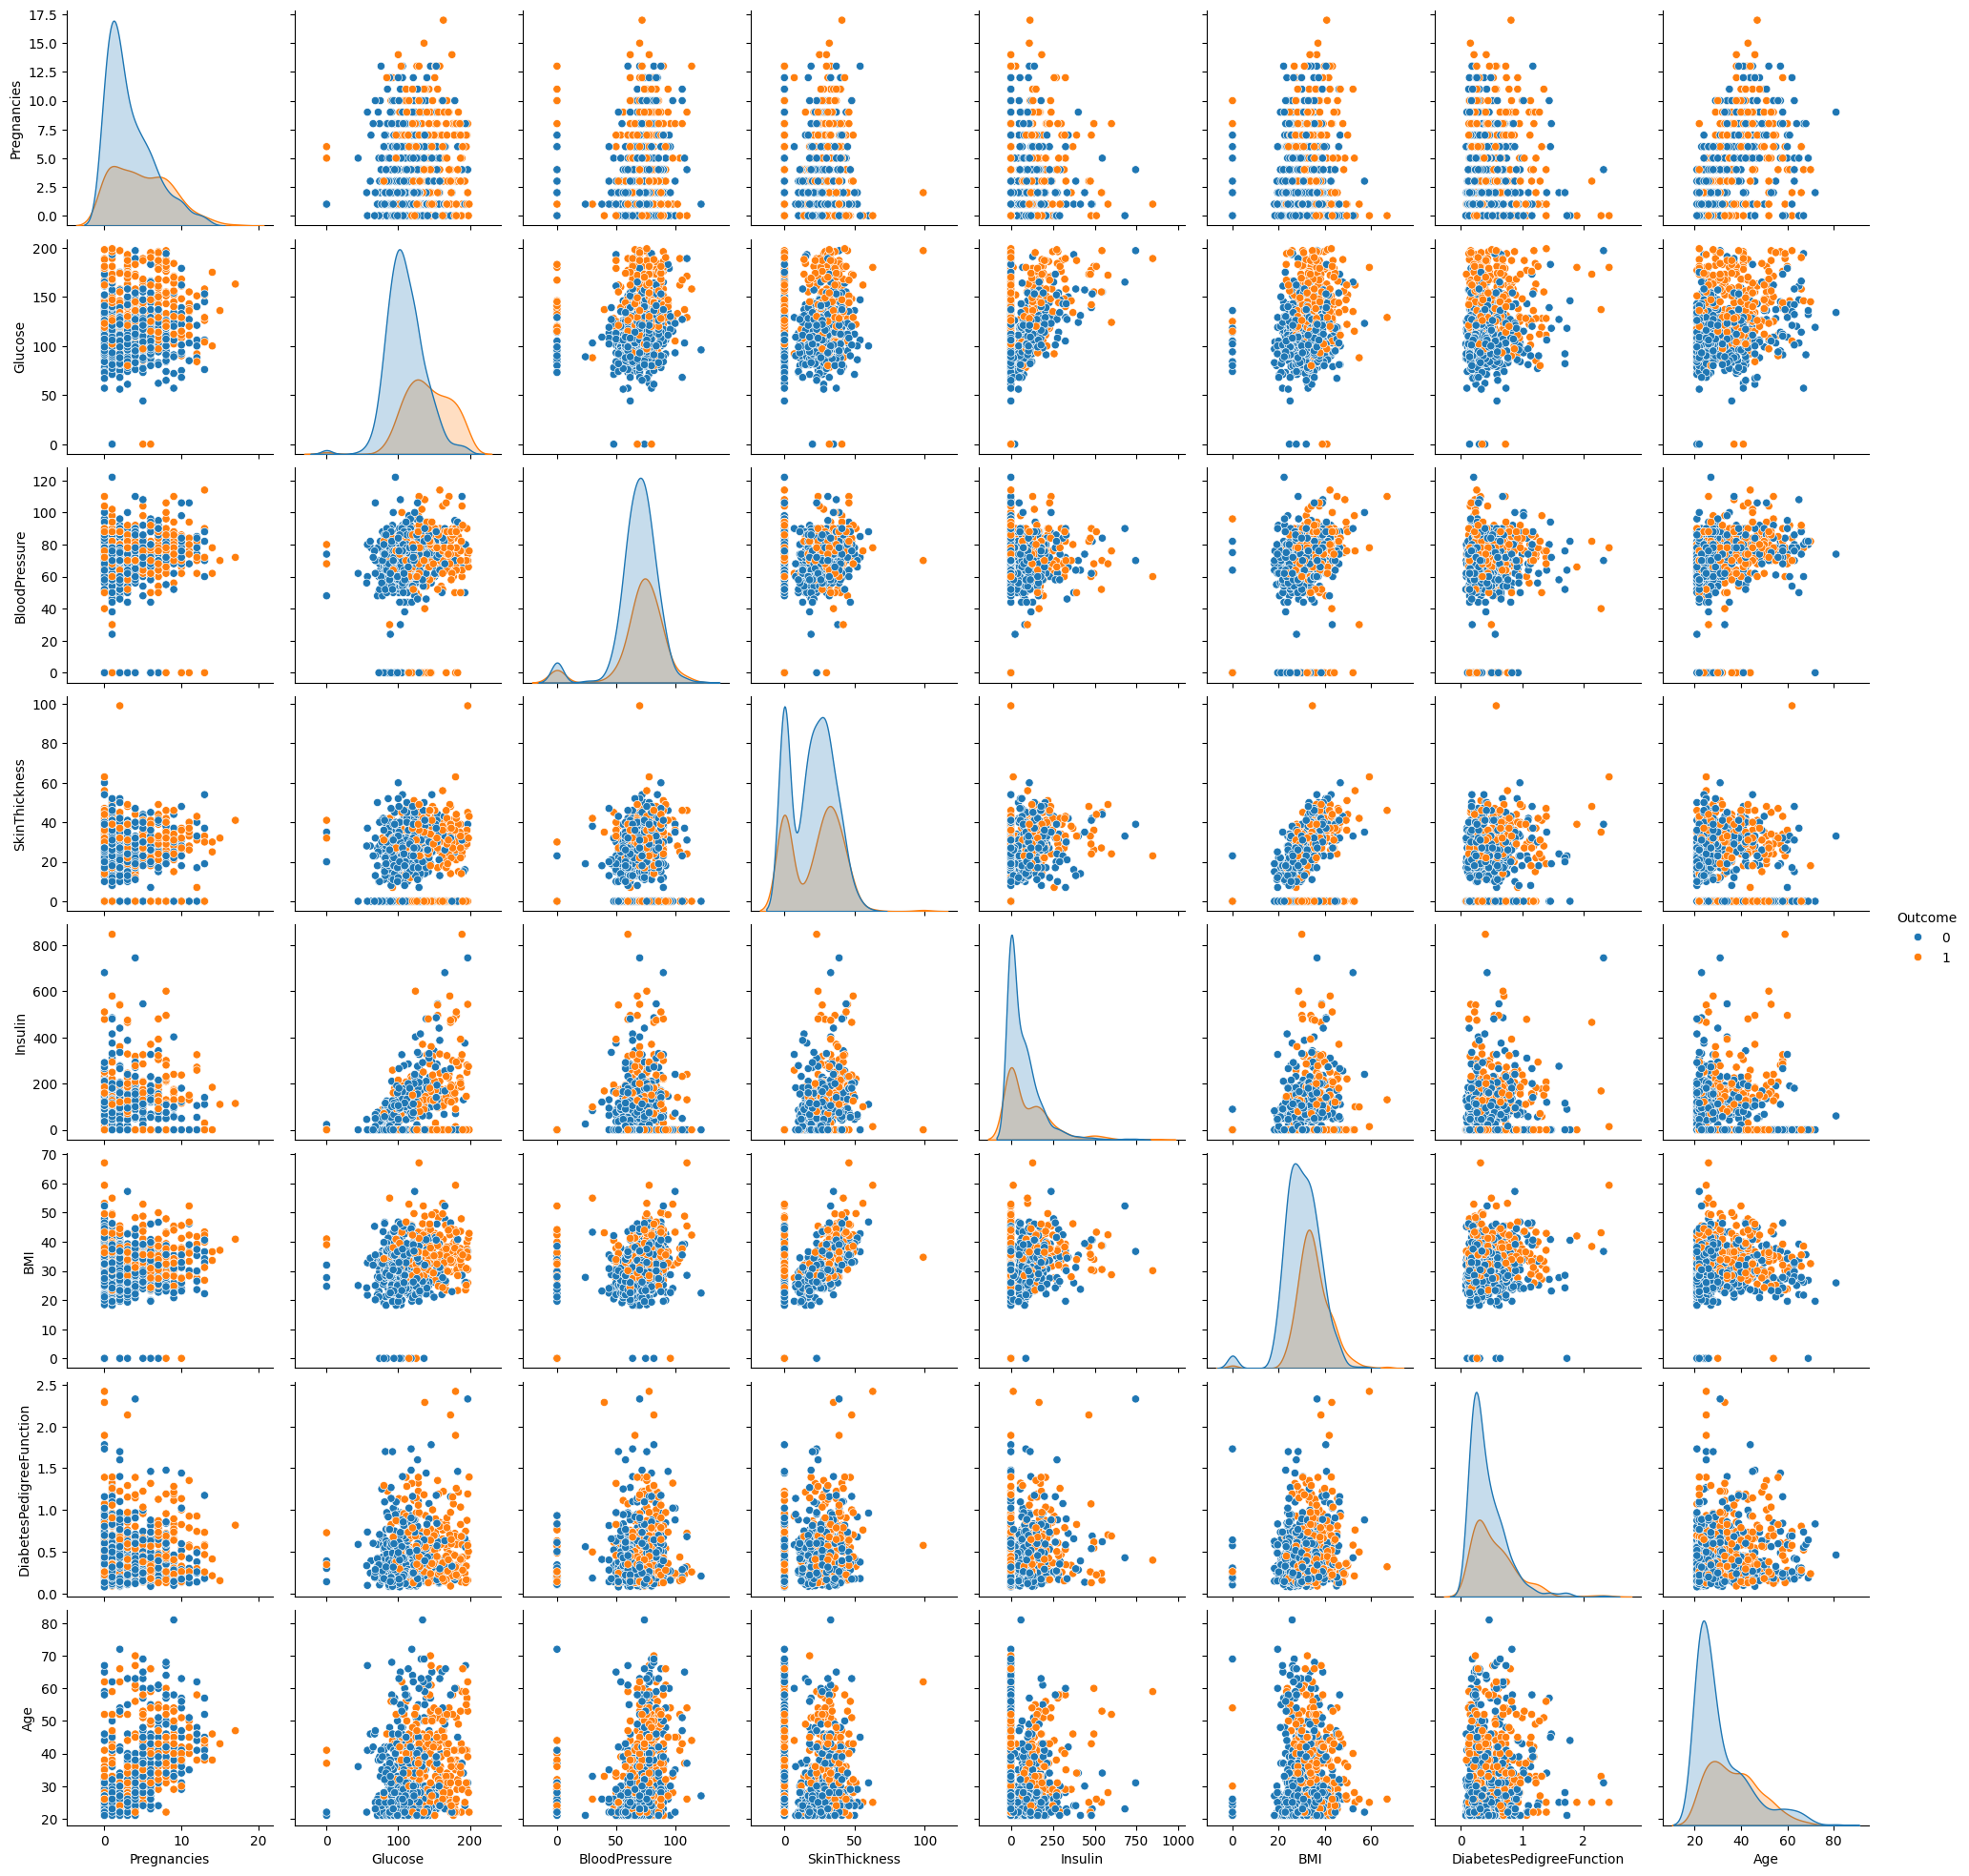

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.pairplot(diabetes_dataset, hue='Outcome')
plt.show()


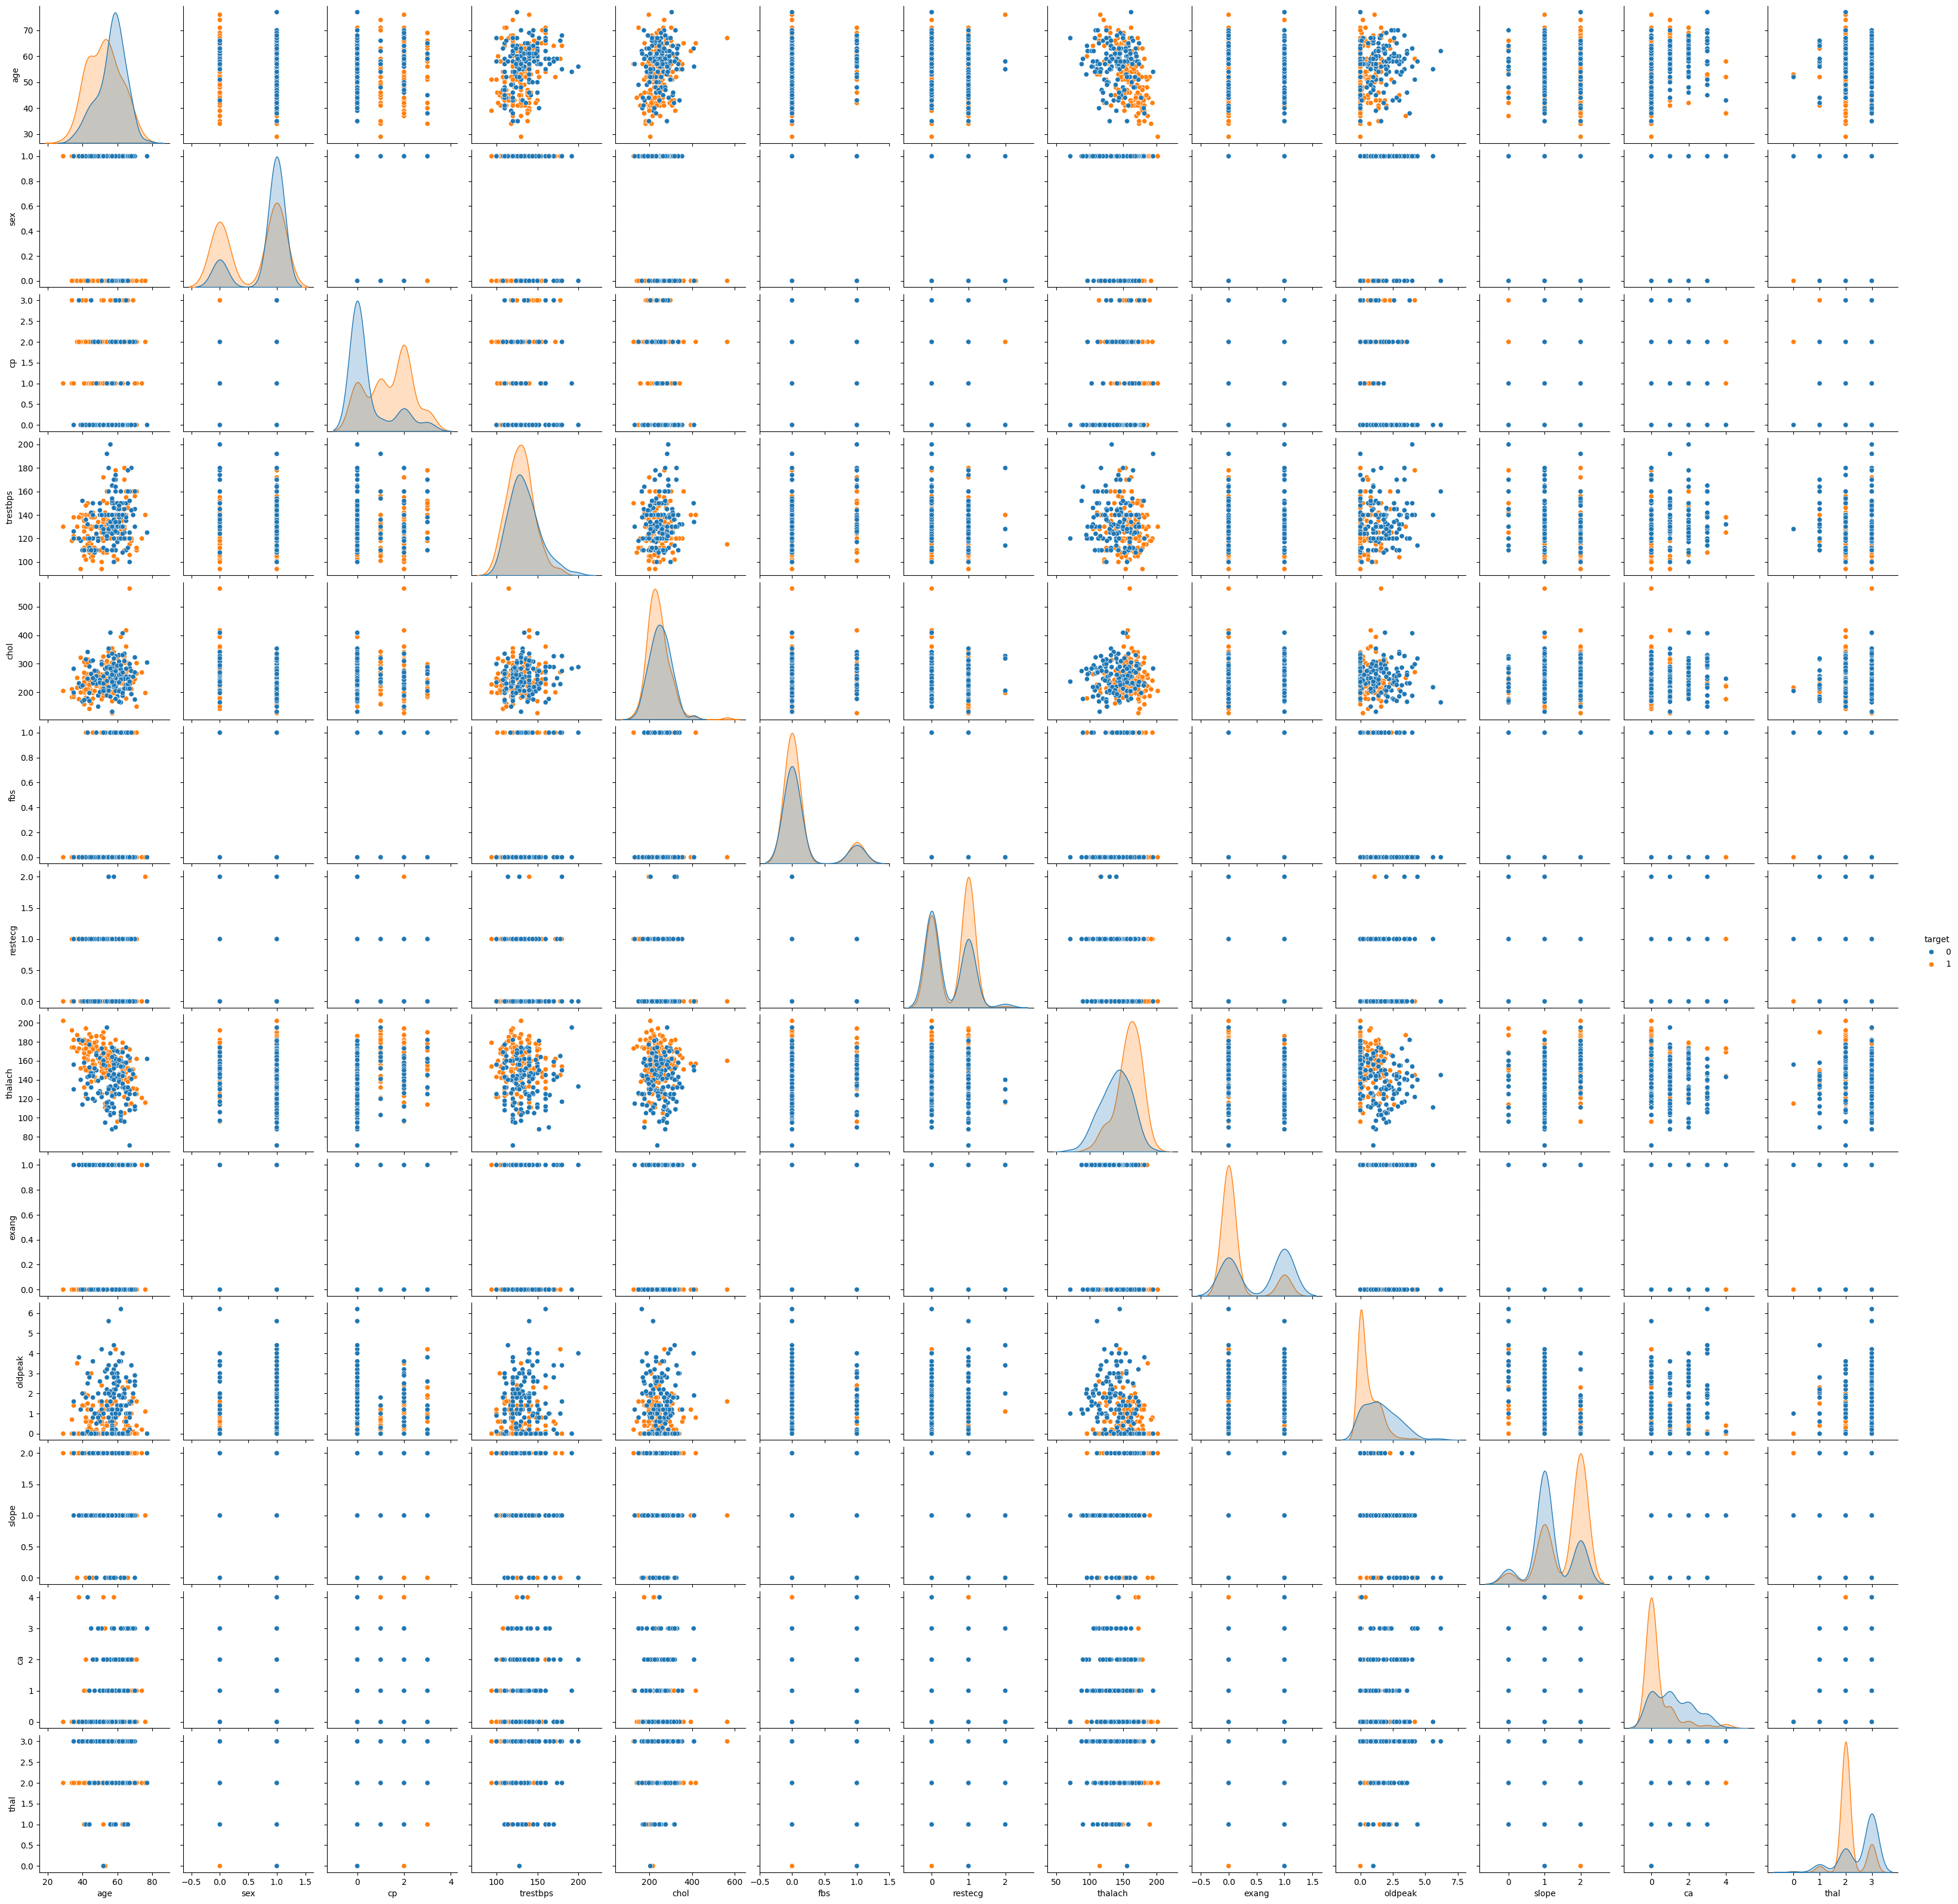

In [11]:
sns.pairplot(heart_dataset, hue='target')
plt.show()


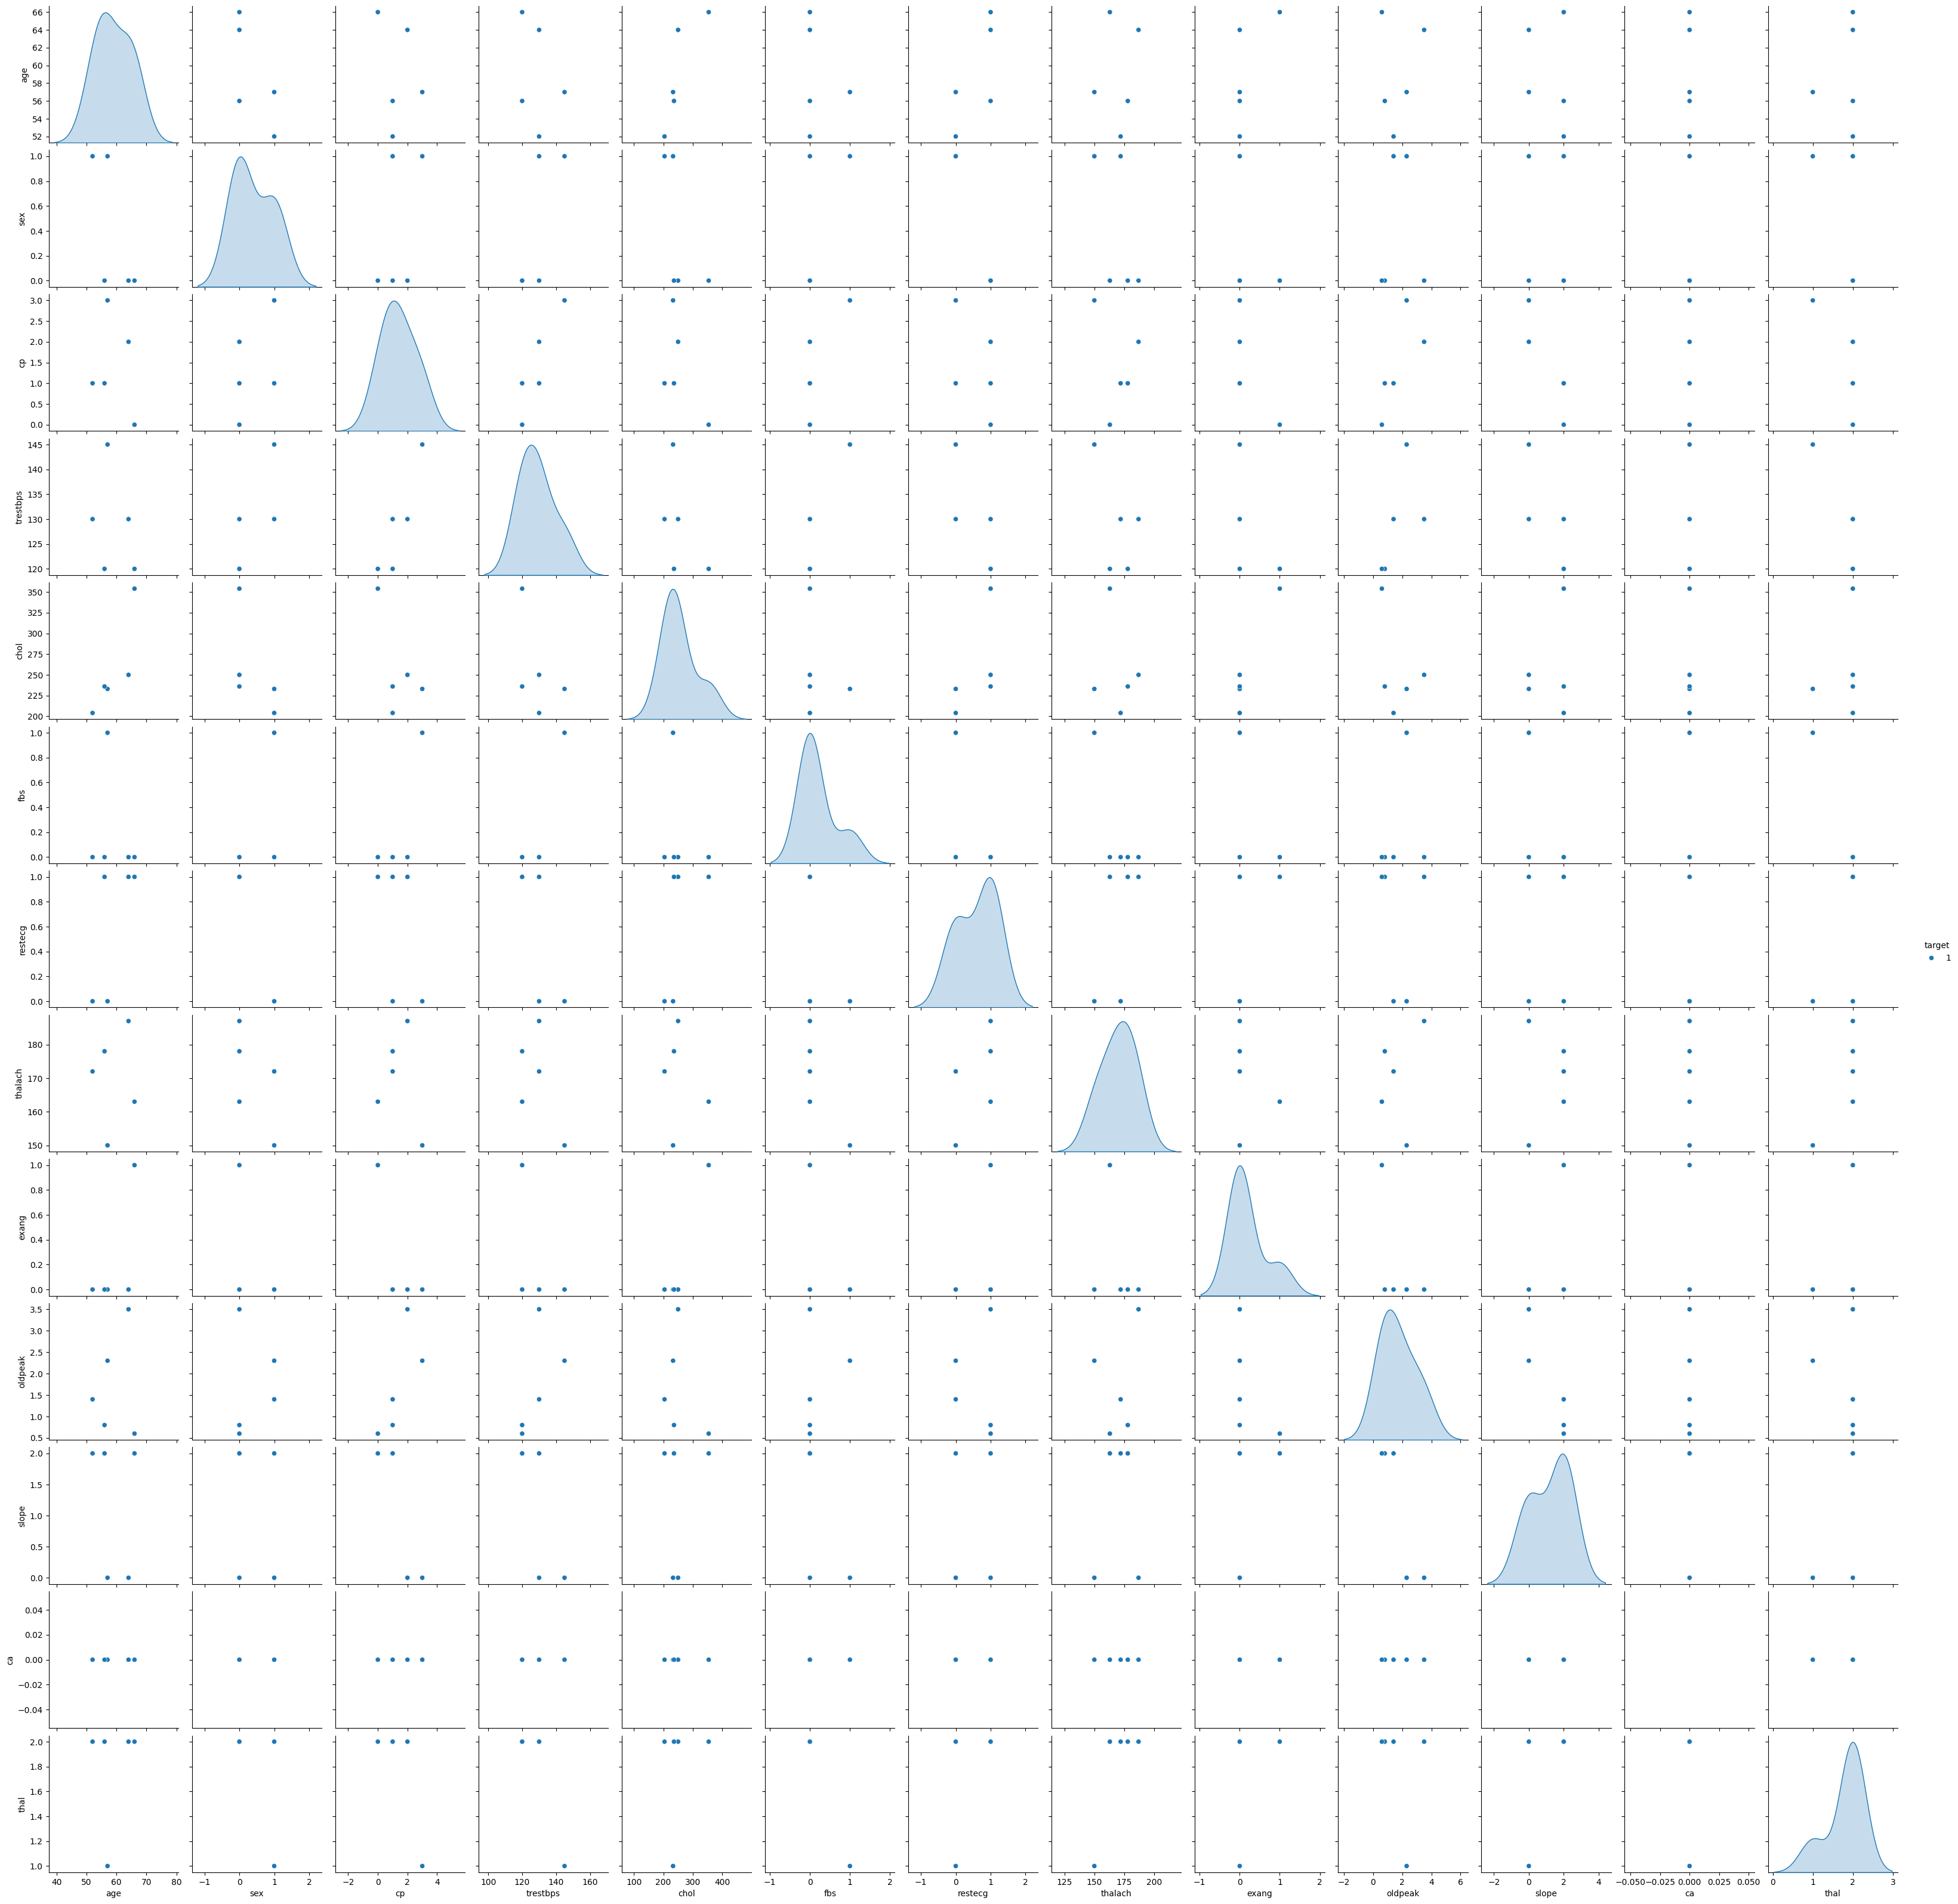

In [13]:
sns.pairplot(hypertension_dataset.head(), hue='target')
plt.show()
